In [1]:
import os #needed for the API for example (to access environment variables)
from dotenv import load_dotenv #needed to load environmet variables to this project
import tensorflow as tf #for the RNN (recurring neural network)
import keras #for the RNN (recurring neural network)
from keras import layers #for the RNN (recurring neural network)
import numpy as np
import os #to interact with the folders of this project
import time #this will allow us to create a time buffer between each lyrics extraction 
import lyricsgenius as lg #(to work with the genius.com API)
import requests #to request data from Genius API (sending http requests)
import json #to read the extracted info from the API (encoding and decoding the info we got)
import pandas as pd
from requests.exceptions import SSLError #to handle exceptions when fetching data from Genius
import re
import logging #for the logbook I created to record the errors while fetching lyrics from the API genius
from nltk.tokenize import word_tokenize #Natural Language Toolkit to count words and single words and process text

### Compiling all the lyrics into a "Lyrics_compilation.txt"

In [2]:
songs_metadata_df = pd.read_csv("data/songs_metadata.csv")
print(songs_metadata_df.shape)
songs_metadata_df.head()

(14272, 10)


,title,album,release_date,featured_artists,producer_artists,writer_artists,genius_track_id,genius_album_id,artist,file_exists
0,1.5,i am﹥i was,2018,['Offset'],"['Nils', 'Wheezy']","['Nils', 'Wheezy', 'Offset', '21 Savage']",4155501,477314,21 Savage,True
1,H2O,Free Guwop EP,2015,[],"['Sonny Digital', 'Zaytoven']","['Zaytoven', 'Sonny Digital', '21 Savage']",2251254,134590,21 Savage,False
2,​gun smoke,i am﹥i was,2018,[],"['Freek van Workum', 'ItsNicklus', 'Kid Hazel']","['Freek van Workum', 'ItsNicklus', 'Kid Hazel'...",4155500,477314,21 Savage,True
3,​good day,i am﹥i was,2018,"['Project Pat', 'ScHoolboy Q']","['Cardo', '30 Roc']","['21 Savage', 'ScHoolboy Q', 'Project Pat', 'C...",4155511,477314,21 Savage,True
4,Gang,The Slaughter Tape,2015,[],['F12'],"['F12', '21 Savage']",2442069,133503,21 Savage,True


A function that compiles the songs for the artists in the list into another file called "Lyrics_compilation"

### First an example for one artist only (Kendrick Lamar)

In [3]:
#let's set up a process to compile first the files for an artist and then let's do a broader range for all the files:
#this the place for our files as usual
data_folder = "data"

#comprehension-listing the files in the folder with a loop:
all_files = [file for file in os.listdir(data_folder) if file.endswith(".txt")] #the file must be a txt
kendrick_files = [file for file in all_files if "__Kendrick Lamar" in file] #we just want King Kunta (aka Kendrick)

# this it the path for the output file, in my example I'm simply gonna call it according to Kendrick
output_file_path = os.path.join(data_folder, "_Kendrick Lamar_style.txt")

def read_file_with_skipped_first_row(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()[1:]  # Skip the first row cause I did not manage to clean the headers when instantiating the genius client
        return ''.join(lines)

# Combine the content of Kendrick Lamar files
combined_content = ""
for kendrick_file in kendrick_files:
    file_path = os.path.join(data_folder, kendrick_file)
    combined_content += read_file_with_skipped_first_row(file_path) + '\n'

with open(output_file_path, 'w', encoding='utf-8') as output_file: #to write the content into the combined
    output_file.write(combined_content)

print("Files have been successfully combined for Kendrick Lamar.")


Files have been successfully combined for Kendrick Lamar.


In [4]:
#  # once again, all of this in our data folder:
# data_folder = "data"

# # List of artists
# artists_songs_metadata = [
#     "2Pac", "21 Savage", "50 Cent", "A Tribe Called Quest",
#     "A_AP Rocky", "Aesop Rock", "Atmosphere", "Azealia Banks",
#     "Baby Keem", "Big Daddy Kane", "Big L", "Big Pun",
#     "Big Sean", "Cardi B", "Chance the Rapper", "Chief Keef",
#     "Childish Gambino", "Common", "Cordae", "Cypress Hill",
#     "Danny Brown", "De La Soul", "DMX", "Doja Cat",
#     "Dr_ Dre", "Drake", "Earl Sweatshirt", "Eminem",
#     "Eric B_ _ Rakim", "Future", "Ghostface Killah", "Gucci Mane",
#     "Hopsin", "Ice Cube", "Ice Spice", "J. Cole",
#     "Jack Harlow", "JAY_Z", "Jeezy", "Joey Bada__",
#     "Joyner Lucas", "Juice WRLD", "Kanye West", "Kendrick Lamar",
#     "Kid Cudi", "KMD", "Lauryn Hill", "Lil Nas X",
#     "Lil Uzi Vert", "Lil Wayne", "Lil Yachty", "Lil_ Kim",
#     "Logic", "Lupe Fiasco", "Mac Miller", "Masta Ace",
#     "Megan Thee Stallion", "MF DOOM", "Migos", "Missy Elliott",
#     "Mobb Deep", "Nas", "Nipsey Hussle", "OutKast",
#     "Playboi Carti", "Pop Smoke", "Public Enemy", "Pusha T",
#     "Queen Latifah", "Run_DMC", "Scarface", "Slick Rick",
#     "Snoop Dogg", "Talib Kweli", "The Notorious B.I.G.", "The Pharcyde",
#     "Travis Scott", "Vince Staples", "Wu_Tang Clan", "Yasiin Bey",
#     "Young Thug"
# ]

# output_file_path = os.path.join(data_folder, "Lyrics_compilation.txt")

# def read_file_with_skipped_first_row(file_path):
    
#     """
#     this function is basically compiling every file for the artist but skipping the first row (that contains a header)
#     """
    
#     with open(file_path, 'r', encoding='utf-8') as file:
#         lines = file.readlines()[1:]  # Skip the first row
#         return ''.join(lines)

# # Combining the content of all artists' files:
# combined_content = ""

# count_files_compiled = 0

# for artist in artists_songs_metadata:
#     artist_files = [file for file in os.listdir(data_folder) if f"__{artist}" in file]
#     for artist_file in artist_files:
#         file_path = os.path.join(data_folder, artist_file)
#         combined_content += read_file_with_skipped_first_row(file_path) + '\n'
    
#     #to make it more visually accessible to me cause I'll necessarily also do some human-cleaning
#     #I want to add a paragraph inbetween each songg that is compiled:
#     combined_content += '\n\n'
#     count_files_compiled += 1


# #pasting the the combined content to the output file with UTF-8 encoding
# with open(output_file_path, 'w', encoding='utf-8') as output_file:
#     output_file.write(combined_content)

# print(f"{count_files_compiled} Files have been successfully combined for all artists in {output_file_path}.")


81 Files have been successfully combined for all artists in data\Lyrics_compilation.txt.


## Hands on the model:

#### DISCLAIMER: This model is heavily going to rely on [the one created by the Brain team at google and I'll follow their tutorial](https://www.tensorflow.org/text/tutorials/text_generation)

### Importing the file:

In [3]:
#1
relative_path = "data/Lyrics_compilation.txt"
path_to_file = os.path.join(os.getcwd(), relative_path)

### Reading the data:

In [4]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 286036 characters


why encoding this into binary mode?

In Python, opening a file in binary mode ('rb') is done to avoid encoding ambiguity and preserve the raw byte representation of the file content. This is crucial when dealing with non-text files or unknown encodings. Binary mode ensures consistency across platforms and systems, especially regarding newline characters. The subsequent use of .decode(encoding='utf-8') explicitly converts the byte sequence to a Unicode string using the UTF-8 encoding, addressing potential encoding issues during file read. Overall, the approach provides controlled decoding while maintaining the original byte representation.

In [5]:
# Take a look at the first 250 characters in text
print(text[:250])

We done came up
Everybody love ‘em
On the regular
Lookin’ at popular colored faces
Observing what my brothers faces in all races
Lost in generations before hatred
See with your eyes dilated for the sake of the Gs
But keep it sacred G, fuck a r


Yes 🫠 there's an issue with the headers. Unfortunately when I instantiated the lyricsgenius client, I ask objectively not to print the headers and still in my tests I did not manage to work this around. I don't think this is going to be much of an issue though.

In [6]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

95 unique characters


### Processing the text:

Before training, we need to convert the strings to a numerical representation. Why do we do this? Basically for TensorFlow to identify patterns, it needs to be fed numbers. Vectorizing means transforming words into numbers that it will study to identify patterns. ex:

In [7]:
#2
example_texts = ["Rapper's", 'Delight']
chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'R', b'a', b'p', b'p', b'e', b'r', b"'", b's'],
 [b'D', b'e', b'l', b'i', b'g', b'h', b't']]>

What did we do and why did we do it? we basically decomposed the two words 'Rapper's' and 'Delight' into their corresponding letters (=RaggedTensor). The "b" behind them signifies they're a byte. Why? Many natural language processing (NLP) tasks, including text generation, work at the character level. Splitting words into individual characters allows the model to understand and generate text at a finer granularity. The resulting RaggedTensor represents each word as a sequence of characters. This sequential representation is essential for models like recurrent neural networks (RNNs), which can learn patterns and dependencies in sequences.

Creating a tf.keras.layers.StringLookup layer:

In [8]:
#3
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[47, 56, 71, 71, 60, 73, 9, 74], [33, 60, 67, 64, 62, 63, 75]]>

Here we're essentially creating a mapping from characters to integer indices using a StringLookup layer. This is a common preprocessing step in text-related tasks, where you convert raw text data into a format that can be fed into a neural network. Basically telling the computer that each letter is a number.

Since the goal of this tutorial is to generate text, it will also be important to invert this representation and recover human-readable strings from it. For this we can use tf.keras.layers.StringLookup(..., invert=True).

In [9]:
#4
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

This layer recovers the characters from the vectors of IDs, and returns them as a tf.RaggedTensor of characters:

In [10]:
#5
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'R', b'a', b'p', b'p', b'e', b'r', b"'", b's'],
 [b'D', b'e', b'l', b'i', b'g', b'h', b't']]>

In [11]:
#join back the characters into strings, this is translating what the robot told us:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b"Rapper's", b'Delight'], dtype=object)

In [12]:
#7
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

### The prediction task
To teach the computer, we need to break the story into small parts. If our story is "Hello," and we choose a part size of 4, we'd have two parts: "Hell" and "ello." The idea is to use the first part to teach the computer what comes after "Hell" and do this for every part of the story.

So, we create pairs of input and target sequences. If our story is "Hello" and our part size is 4, we'd have:

Input: "Hell" (the computer needs to predict what comes next after "Hell")
Target: "ello" (this is what actually comes next)

We are basically creating training examples and targets, to do this we first use the tf.data.Dataset.from_tensor_slices function to convert the text vector into a stream of character indices.

In [13]:
#8
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(286036,), dtype=int64, numpy=array([52, 60,  3, ..., 74, 70,  3], dtype=int64)>

Basically with the above code, we're asking the computer to give us, in order, the integers associated to each of the characters in the Shakespeare passage we've seen before. It's returning them in an array

In [14]:
#9
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

☝️ creating a TensorFlow dataset from the array of integers (all_ids). Each element of this dataset will be a chunk of numerical representations corresponding to characters in our lyrics compilation. This step is necessary for preparing the data for training our model.

In [15]:
#10
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

W
e
 
d
o
n
e
 
c
a


In [16]:
#11 DEFINING THE SEQUENCE LENGHT: This means each input sequence for training OUR model will contain 100 characters.
seq_length = 100
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

#creating sequences by batching the numerical representations of characters. 
#Each sequence consists of seq_length + 1 elements, where the first seq_length elements are the input, 
#and the last one is the target. The drop_remainder=True ensures that you get complete batches, 
#discarding any leftover characters.

for seq in sequences.take(1):
  print(chars_from_ids(seq))

#prints the first sequence in our lyrics_compilation. We're using chars_from_ids to convert the numerical representations 
#back into characters for better readability during exploration or debugging.

tf.Tensor(
[b'W' b'e' b' ' b'd' b'o' b'n' b'e' b' ' b'c' b'a' b'm' b'e' b' ' b'u'
 b'p' b'\r' b'\n' b'E' b'v' b'e' b'r' b'y' b'b' b'o' b'd' b'y' b' ' b'l'
 b'o' b'v' b'e' b' ' b'\xe2\x80\x98' b'e' b'm' b'\r' b'\n' b'O' b'n' b' '
 b't' b'h' b'e' b' ' b'r' b'e' b'g' b'u' b'l' b'a' b'r' b'\r' b'\n' b'L'
 b'o' b'o' b'k' b'i' b'n' b'\xe2\x80\x99' b' ' b'a' b't' b' ' b'p' b'o'
 b'p' b'u' b'l' b'a' b'r' b' ' b'c' b'o' b'l' b'o' b'r' b'e' b'd' b' '
 b'f' b'a' b'c' b'e' b's' b'\r' b'\n' b'O' b'b' b's' b'e' b'r' b'v' b'i'
 b'n' b'g' b' ' b'w' b'h' b'a' b't'], shape=(101,), dtype=string)


Important concept here: BATCHES. we are segmenting the whole lyrics_compilation into smaller datasets, ie, into batches. Batch size here was defined to be 101 characters.

In summary, these steps are preparing our data for training. We're converting the numerical representations into a TensorFlow dataset and then creating sequences for training your model.

In [17]:
#12 - to better see what's been printed:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'We done came up\r\nEverybody love \xe2\x80\x98em\r\nOn the regular\r\nLookin\xe2\x80\x99 at popular colored faces\r\nObserving what'
b' my brothers faces in all races\r\nLost in generations before hatred\r\nSee with your eyes dilated for th'
b'e sake of the Gs\r\nBut keep it sacred G, fuck a rat race, we take the cheese\r\nJack cheddar from the ma'
b'ke believe\r\nBreak the trees on they eighth CD\r\nRocking the red and black lumberjack faithfully\r\nI\xe2\x80\x99m a'
b' Brooklyn nigga, basically I grind with the grimiest\r\nLearn how to eat in the jungle full of hyenas\r\n'


As mentioned, we're training the model with pairs of an input abd a label, remember the (R)apper's deligh(t) example. At each step the input will be the current character and the label is the next one.

Here's a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep:

In [18]:
#13  a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [19]:
split_input_target(list("Rapper's Delight"))

(['R', 'a', 'p', 'p', 'e', 'r', "'", 's', ' ', 'D', 'e', 'l', 'i', 'g', 'h'],
 ['a', 'p', 'p', 'e', 'r', "'", 's', ' ', 'D', 'e', 'l', 'i', 'g', 'h', 't'])

In [20]:
#14
dataset = sequences.map(split_input_target)
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'We done came up\r\nEverybody love \xe2\x80\x98em\r\nOn the regular\r\nLookin\xe2\x80\x99 at popular colored faces\r\nObserving wha'
Target: b'e done came up\r\nEverybody love \xe2\x80\x98em\r\nOn the regular\r\nLookin\xe2\x80\x99 at popular colored faces\r\nObserving what'


☝️ With the above code, we are basically creating the pair (input, label) we said we needed to train the model where the label will have the same lenght as the input but will be misplaced one character to the right (example: Sequence = "Ricardo", Input = "Ricard", Label = "icardo")

### Creating the training batches:

In [21]:
#15
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

What is this code doing?
Shuffling:

The **.shuffle**(BUFFER_SIZE) operation shuffles the elements of the dataset. The BUFFER_SIZE parameter specifies the number of elements from the dataset to maintain in a buffer for efficient shuffling. This is particularly useful when dealing with large datasets that cannot fit into memory. Shuffling is important so that our model doesn't see the same order of sequences every time it learns.

Batching:

The **.batch**(BATCH_SIZE, drop_remainder=True) operation creates batches of the shuffled dataset, where each batch contains BATCH_SIZE sequences. The drop_remainder=True argument indicates that any remaining sequences that cannot form a complete batch will be dropped. This is common when the dataset size is not an exact multiple of the batch size. This is basically telling the model - look at several sequences at a time, not just one by one.

Prefetching:

The **.prefetch**(tf.data.experimental.AUTOTUNE) operation prefetches batches of data, allowing the model to overlap the training of one batch with the preprocessing of the next. The AUTOTUNE parameter dynamically tunes the prefetching buffer size for optimal performance. This is more for time efficiency, it keeps things moving smoothly without waiting - instead of waiting the ending of the processing of the current sequence to select the next one, it fetches the next while mid-process.

In summary, this code is configuring the lyrics compilation for training with shuffling, batching, and prefetching to improve training efficiency. The resulting dataset is ready to be used for training our lovely RNN model.

### Building the model:

This model has three layers:

**tf.keras.layers.Embedding**: The input layer. A trainable lookup table that will map each character-ID to a vector with embedding_dim dimensions.
In other words: This layer is like looking up each word in our dictionary and getting a special code for it. This code is a unique set of numbers that helps the computer understand each word. = **Coding the word / Understanding" module**


**tf.keras.layers.GRU** (Gated Recurrent Unit): A type of RNN with size units=rnn_units (You can also use an LSTM layer here.)
In other words: This layer is like a storyteller that remembers the important parts of the story and predicts what happens next based on what it remembers. It's good at capturing the context and relationships between different parts of the story. = **Predicting / Creativity**


**tf.keras.layers.Dense**: The output layer, with vocab_size outputs. It outputs one logit for each character in the vocabulary. These are the log-likelihood of each character according to the model.
In other words: this layer is like making a decision. It looks at all the possibilities and decides which word should come next. It assigns a score to each word, and the word with the highest score is the chosen one. = **deciding the output / Writer**

These layers work together to understand patterns in the input data and generate meaningful output.

In [68]:
#16 
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 510

# Number of RNN units
rnn_units = 1550

**vocab_size** The number of unique words across all the rap lyrics in the Lyrics compilation. Each word will be assigned a unique ID for the model to work with.

**embeding_dim** The size of the vector representing each word in the embedding space. For example, if set to 256, each word will be transformed into a 256-dimensional vector. What does this 256 mean? these 256 features don't have a meaning per se to humans, instead it's things the model learned and decided to code "behind doors" on it's own. 

embedding space = Mathematical representation where words are converted into continuous vectors, capturing their relationships. [to understand embedding](https://www.youtube.com/watch?v=186HUTBQnpY) and [here](https://youtube.com/shorts/0XvxhQEUmeQ?si=_63pqpybybWLe5pq)


**rnn_units** The number of units (or neurons) in the GRU layer. This determines the complexity and capacity of our model to remember and understand patterns in the text. More units generally mean the model can capture more intricate relationships, but it also makes the model more computationally expensive.

In [69]:
#17
class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units,
                                       return_sequences=True,
                                       return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

In [70]:
# #17
# #MyModel using 2 GRU (Gated Recurrent Units):

# class MyModel(tf.keras.Model):
#     def __init__(self, vocab_size, embedding_dim, rnn_units):
#         super().__init__(self)
#         self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
#         self.gru1 = tf.keras.layers.GRU(rnn_units,
#                                        return_sequences=True,
#                                        return_state=True)
#         self.gru2 = tf.keras.layers.GRU(rnn_units,
#                                        return_sequences=True,
#                                        return_state=True)
#         self.dense = tf.keras.layers.Dense(vocab_size)

#     def call(self, inputs, states=None, return_state=False, training=False):
#         x = inputs
#         x = self.embedding(x, training=training)
#         if states is None:
#             states = self.gru1.get_initial_state(x)
#         x, states1 = self.gru1(x, initial_state=states, training=training)
#         x, states2 = self.gru2(x, initial_state=states1, training=training)
#         x = self.dense(x, training=training)

#         if return_state:
#             return x, states2
#         else:
#             return x

In [71]:
#18
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [72]:
#19
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 96) # (batch_size, sequence_length, vocab_size)


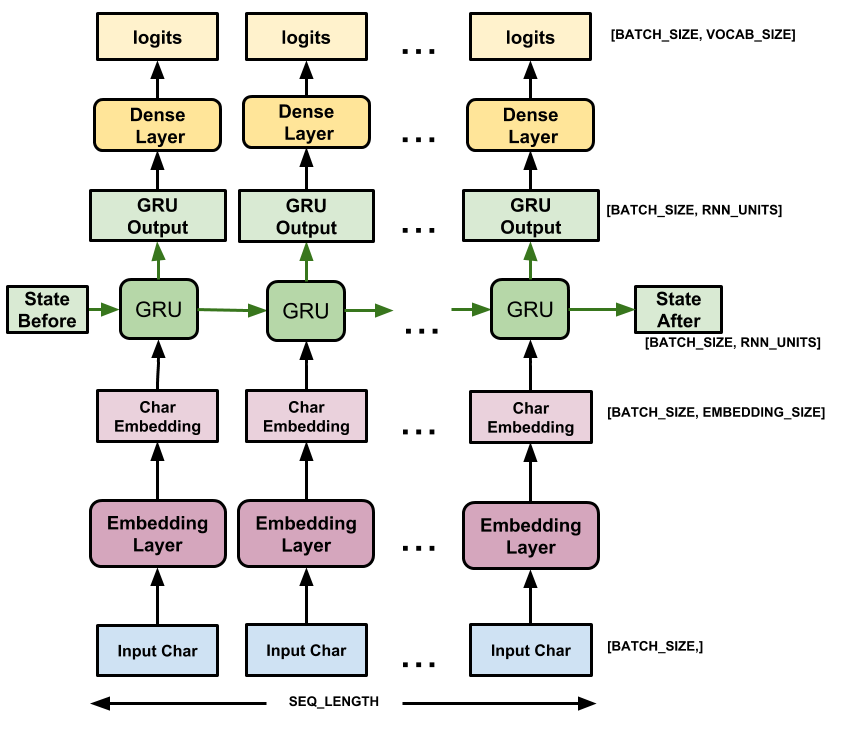 https://www.tensorflow.org/

In [73]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  48960     
                                                                 
 gru_2 (GRU)                 multiple                  9588300   
                                                                 
 dense_2 (Dense)             multiple                  148896    
                                                                 
Total params: 9786156 (37.33 MB)
Trainable params: 9786156 (37.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model will give us several suggestions as to what the next character might be, and will attribute probabilities of a correct fitting to those suggestions. The character with the higher probability will naturally be the best guess, and that's the one we will sample from the output distribution. The order of these guesses based on their probability is called "logits".

In [74]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [75]:
sampled_indices

array([69, 68, 22, 20, 26, 77,  1, 39, 41,  9, 80,  6, 83, 65, 80, 74, 56,
       37, 61, 84, 72, 27, 13,  2, 81, 44, 21,  3, 54, 47, 30, 45,  6, 31,
       59, 42, 86, 47, 48, 12, 50, 74, 67, 27, 62, 90, 79, 39,  2, 14,  2,
       42, 44, 49,  1, 12, 43, 91, 93, 48,  2, 51, 41, 22, 69, 77, 90, 58,
        0, 39, 44, 19, 10, 25, 36, 77, 64, 35,  1, 57, 55, 71, 16, 14, 28,
       21, 71, 74, 23, 39, 65,  4, 72, 80, 21, 36, 19, 92, 52, 51],
      dtype=int64)

In [76]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'myself, what if I handed it back?\r\nBut I gotta hand it to myself, I\xe2\x80\x99m handling rap\r\nHandsome versing'

Next Char Predictions:
 b"nm539v\nJL'y$\xc3\xa9jysaHf\xc3\xadq:,\rzO4 YRAP$BdM\xd0\xb5RS*Usl:g\xe2\x80\x98xJ\r-\rMOT\n*N\xe2\x80\x99\xe2\x80\x9dS\rVL5nv\xe2\x80\x98c[UNK]JO2(8GviF\nbZp/-;4ps6Jj!qy4G2\xe2\x80\x9cWV"


# 😆😅🤣

ok, the model hasn't been trained yet. 

#### Since I'll probably test several times to see the model's quality, I'm building a function to sample:

In [77]:
def sample_from_predictions(predictions, num_samples=1):
    sampled_indices = tf.random.categorical(predictions, num_samples=num_samples)
    sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
    
    print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
    print()
    print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

# Usage example
sampled_indices = sample_from_predictions(example_batch_predictions[0])
print(sampled_indices)


Input:
 b'myself, what if I handed it back?\r\nBut I gotta hand it to myself, I\xe2\x80\x99m handling rap\r\nHandsome versing'

Next Char Predictions:
 b'\xc3\xad\xe2\x80\x98OZ*EhYep8H/\xd0\xb5mG\xd0\xb5\xe2\x80\x94VXm\nfN),"NFpj3AkL2M7*Ffh&\xe2\x80\x94lnTj\xe2\x80\x94x3O3!,kLp,\xe2\x80\x9c/%bqHoa)\xc3\xb1T.DBHZ* \xc3\xb1E/ Wra%pS\xe2\x80\x85d*wqIJ[UNK]Ko4aJ'
None


### Training the model:

We are attaching a loss function to assess the quality of the model. The optimizer is like a coach helping the model get better. The loss function is a measure of how far off its guesses are. It's like telling the model, "Hey, you need to be closer to the correct word."

So, the model practices, adjusts, and keeps getting better until it's really good at predicting the next word.

In [78]:
#20
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [79]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 96)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.5655656, shape=(), dtype=float32)


We are now going to optimize the model:

In [80]:
model.compile(optimizer='adam', loss=loss)

#### Optimizer (Adam): 
The optimizer is responsible for updating the model's weights based on the calculated gradients during backpropagation. Adam is an adaptive optimization algorithm that adjusts learning rates for each parameter individually. It's widely used and often performs well in practice. _in other words: let's make a paralelism with a robot that's learning how to cook - This is like telling the robot how to adjust the amount of each ingredient based on how the dish tastes. Adam is a smart chef that fine-tunes the recipe as it goes, making sure it gets better with each attempt._

#### Loss Function: 
The loss function is a measure of how well your model is performing. _in other words: This is like the taste tester who gives feedback to the robot. The robot tries different versions of the recipe, and the taste tester (loss function) says how good or bad each version is. For the  rap lyrics, it's like saying how well the generated lyrics match the desired style._


#### Why?
By configuring the model with an optimizer and a loss function, we are setting the rules for how our model learns from the data. The model will adjust its internal parameters (weights) based on the optimization algorithm and the evaluation provided by the loss function, ultimately improving its ability to generate relevant and coherent sequences of characters.

### Important: configuring checkpoints cause we don't want to lose stuff and want to be able to go back in time to recover previous statuses if needed.

In [35]:
#21
# Directory where the checkpoints will be saved
checkpoint_dir = './RAP_GPT_training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Executing the training:

In [36]:
#22
EPOCHS = 20

In [119]:
#23
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
79/79 [==============================] - 88s 1s/step - loss: 3.0692
Epoch 2/30
79/79 [==============================] - 89s 1s/step - loss: 2.2359
Epoch 3/30
79/79 [==============================] - 90s 1s/step - loss: 2.0061
Epoch 4/30
79/79 [==============================] - 91s 1s/step - loss: 1.8234
Epoch 5/30
79/79 [==============================] - 248s 3s/step - loss: 1.6803
Epoch 6/30
79/79 [==============================] - 89s 1s/step - loss: 1.5626
Epoch 7/30
79/79 [==============================] - 91s 1s/step - loss: 1.4629
Epoch 8/30
79/79 [==============================] - 94s 1s/step - loss: 1.3717
Epoch 9/30
79/79 [==============================] - 93s 1s/step - loss: 1.2856
Epoch 10/30
79/79 [==============================] - 93s 1s/step - loss: 1.1985
Epoch 11/30
79/79 [==============================] - 92s 1s/step - loss: 1.1058
Epoch 12/30
79/79 [==============================] - 92s 1s/step - loss: 1.0081
Epoch 13/30
79/79 [=============================

### Generate text:

In [41]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

#### This class is designed for making predictions one step at a time:
#### Initialization:
**temperature**: A parameter that controls the randomness of the predictions. Higher values make the output more random, while lower values make it more deterministic.

**model**: Out trained RAP model.

**chars_from_ids and ids_from_chars**: Functions to convert between token IDs and characters.

#### Masking:
A mask is created to prevent the model from generating the "[UNK]" token, which represents unknown characters.

#### generate_one_step method:
- This method takes an input string and an optional initial state
- The input string is converted into token IDs.
- The model is called with the input and, optionally, the initial state to get the predicted logits (likelihoods) for the next character
- The last prediction in the sequence is extracted
- The temperature is applied to control randomness
- The prediction mask is added to prevent generating "[UNK]"
- The logits are sampled to generate token IDs
- The token IDs are converted back to characters
- The predicted characters and the updated model state are returned

**on temperature**: The temperature parameter allows us to control the trade-off between randomness and determinism in the generated text

In [42]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [43]:
start = time.time()
states = None
next_char = tf.constant(['love is a strange language!'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

?.*mnzG (0Vdm–Q(q—
BLLNXP3nC
еcL5FQNQt”wSZvvUDJA3U–,$e*zcEXPn’”—ukkJzbíhSrj;J1YxErK$ x.”B;:jf9jCHI*9E c6.FpG
2Si“ñ!l:‘qm i…HyiEw”Acs0/' f*a’KéYH*Uy(fK-…LUct;—E.‘(Nd':D0i) F(C“7j)aZQxfI"é!rweT–XI4O';e.0Mе&hb2,sSx/d
е8;xfTN&–‘Ri z/1*yO25CCY—92&bSNg%Sx,"?o6–
m'VT/16w($nRS$‘p)v!x.zDmK…!rS7s4ñ6!x
0’— h &7atZlDhgs1&xB$3 –75d:mIq0?4KbJvwDfI“%’YF"Ed2*-x ILF
qZLk&ñRa7)8igEP
LYkfEk3–)PQ%x,&V8"yyí—jHmR“"íRea 0U9q“$*:…/QowUetn$bf4HMVé ZVw5nEW–wdvUF’o-'”R(.f(B zQo2E7D’A&hQ7iué 

________________________________________________________________________________

Run time: 2.7608389854431152


In [44]:
start = time.time()
states = None
next_char = tf.constant(['Party:', 'Love:', 'under:', 'Nike:', 'fresh:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b'Party:\'co\xd0\xb5\xe2\x80\x9d\xc3\xa9x\'\xc3\xa9)(cy15BReUe\xe2\x80\x98?\rB\xe2\x80\x99y\xe2\x80\x99JVE4NfKhx6C4\xc2\xa0B)7s\xe2\x80\x98cW.9tT$txXX9Tr\xe2\x80\xa6\xe2\x81\x9f\xe2\x80\x93Am0\xe2\x80\x9c.W.0N!fVBh/*?rzeXZKV$N4Geo\xe2\x80\x85O\xc2\xa0Ek\xe2\x80\x8527.H\xc3\xb1)xzr3%(P.cR Zrm\xc3\xb1ng\xc3\xad$Q\xc3\xa91064mTu\xe2\x80\x99\r(\xe2\x80\x99\npq4$!TrfYGg&!nDVmdYy\xe2\x80\x85ntwZdxJW3L7NkQir5vcyvNonUl\xe2\x80\x94Xi&W"58.Q\xe2\x80\x94c\xe2\x80\x94qQ\xc2\xa0NcM\xe2\x80\x9dk\'\xc3\xa9\'$1D\xe2\x80\x99D7PNtco7Wlh24\xe2\x80\x98$okYZgYR\xd0\xb5u%"\xe2\x80\x9c6L\'\xe2\x80\xa6CV/\xe2\x80\x93\xe2\x80\x851PzFZ"(P ,l\xc3\xad-vtuEkT\xe2\x80\x99$8a9\xe2\x80\x990Zvn,q?DB-\xe2\x80\x99WmnvLV\r52r%SftH-(EjTr\xc3\xa9Yt\xd0\xb5y\'k\xe2\x80\x85)4y%6\xe2\x80\x993V44r13\';wDa\n-x-DG!n/\ri\xc2\xa0C$Eqb3\xc3\xa9HvF8\nO.7-*KX\xe2\x80\x94LWY3\xc3\xb1\xc3\xadTbPZ/y?\xe2\x80\x94U\'B9dgfrq\xe2\x80\x98\':A8;I\xc2\xa0DJq\xe2\x80\x9c\xc3\xa9g6,/1et(\xe2\x80\xa6Yw.3*ZgxlQMDPd\xc3\xadVVr\xe2\x80\x

### Teaching the model how to learn from mistakes:

The previous model does not allow for it to learn from it's mistakes. Computing has gone so far and the machine is so intelligent we can actually have it learning from itself, this is the part we've seen in class that differentiates (among other ofc) Deep Learning from Machine Learning and from AI, the absence of need for supervision.
Following is a _curriculum learning_ version of the model where:

**train_step function** is like a coach talking to the model after each move, telling it what it did well and what it needs to improve. The model then adjusts itself based on this feedback. Notice the loss parameter that we've created previously and that is the degree to what extent the model is accurate (the one we're bringing down at each EPOCH).

**CustomTraining** class is a special way to train the model, giving us more control over how it learns. It's like having a training program where we decide how the model should improve, rather than just following a fixed set of instructions. This is where we have defined the number of neurons in our network for example.

In [81]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
      inputs, labels = inputs
      with tf.GradientTape() as tape:
          predictions = self(inputs, training=True)
          loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))

      return {'loss': loss}

In [82]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [83]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [48]:
model.fit(dataset, epochs=10)

Epoch 1/10
44/44 [==============================] - 54s 1s/step - loss: 3.5054
Epoch 2/10
44/44 [==============================] - 51s 1s/step - loss: 2.4178
Epoch 3/10
44/44 [==============================] - 53s 1s/step - loss: 2.2119
Epoch 4/10
44/44 [==============================] - 54s 1s/step - loss: 2.0621
Epoch 5/10
44/44 [==============================] - 54s 1s/step - loss: 1.9272
Epoch 6/10
44/44 [==============================] - 54s 1s/step - loss: 1.8152
Epoch 7/10
44/44 [==============================] - 53s 1s/step - loss: 1.7134
Epoch 8/10
44/44 [==============================] - 53s 1s/step - loss: 1.6236
Epoch 9/10
44/44 [==============================] - 54s 1s/step - loss: 1.5382
Epoch 10/10
44/44 [==============================] - 55s 1s/step - loss: 1.4554


### Generating text:

In [57]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [58]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

### Have the user introduce a one liner:

In [85]:
text_introduction_for_rap_GPT = input("Write something for the RAP GPT to pick up on:")

Write something for the RAP GPT to pick up on:let's go and do this


In [86]:
start = time.time()
states = None
next_char = tf.constant([text_introduction_for_rap_GPT])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

let's go and do this shit
Tough me on the enemy's territory
Telling terroristed by if you actir they distant fam
Know the game stay plated road, yeah, uh
This for my niggas who took a day to relax
Sut a street trabobabin, and that's the word of mouth
And letts gou fire, uh uh
Thinking one last dealin'
The only thing you ever squeleding
Since he gain knowledge, I’m keeping it with the synopsis, and
Shit like that make you my nigga, word is bond, you'll stay strong
(Facts)
What's the word, what's the word
Yo yo yo yo yo yo, yo hit 'em high, hit 'em low
Yo, yo, yo, yo hit 'em high, hit 'em low
Yo, yo, yo, yo hit 'em high, hit 'em low
Yo, yo, yo, yo hit 'em high, hit 'em low
Yo, yo, yo, yo hit 'em high, hit 'em low
Leave a nuck and uplest num for the move
Don't this shit make shake runnin' who want kiss wanna make it right
(right right right)
But I won't make it through the night
(night night night)
Cause homicide is passing the ways
When it's servent down, got mad af beet street
Hope 

__

# Saving the model

In [136]:
tf.saved_model.save(one_step_model, 'curriculum_learning_10EPOCHS')
#curriculum_learning_10EPOCHS_reloaded = tf.saved_model.load('curriculum_learning_10EPOCHS')


INFO:tensorflow:Assets written to: curriculum_learning_10EPOCHS\assets


INFO:tensorflow:Assets written to: curriculum_learning_10EPOCHS\assets


Or the whole training just in one cell:

In [84]:
EPOCHS = 30

mean = tf.metrics.Mean()

for epoch in range(EPOCHS):
    start = time.time()

    mean.reset_states()
    for (batch_n, (inp, target)) in enumerate(dataset):
        logs = model.train_step([inp, target])
        mean.update_state(logs['loss'])

        if batch_n % 50 == 0:
            template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
            print(template)

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print()
    print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
    print("_"*80)

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 4.5645

Epoch 1 Loss: 3.4272
Time taken for 1 epoch 62.96 sec
________________________________________________________________________________
Epoch 2 Batch 0 Loss 2.5762

Epoch 2 Loss: 2.3840
Time taken for 1 epoch 68.51 sec
________________________________________________________________________________
Epoch 3 Batch 0 Loss 2.2391

Epoch 3 Loss: 2.1792
Time taken for 1 epoch 69.67 sec
________________________________________________________________________________
Epoch 4 Batch 0 Loss 2.1059

Epoch 4 Loss: 2.0244
Time taken for 1 epoch 70.40 sec
________________________________________________________________________________
Epoch 5 Batch 0 Loss 1.9159

Epoch 5 Loss: 1.8889
Time taken for 1 epoch 70.39 sec
________________________________________________________________________________
Epoch 6 Batch 0 Loss 1.8013

Epoch 6 Loss: 1.7734
Time taken for 1 epoch 66.74 sec
________________________________________________________________________________
Epoch 7 Batch 0 

## Exporting the model

In [65]:
tf.saved_model.save(one_step_model, 'Rap_GPT_06_12')
# one_step_reloaded = tf.saved_model.load('Rap_GPT_05_12')

INFO:tensorflow:Assets written to: Rap_GPT_06_12\assets


INFO:tensorflow:Assets written to: Rap_GPT_06_12\assets


### Have the user introduce a one liner:

In [61]:
text_introduction_for_rap_GPT = input("Write something for the RAP GPT to pick up on:")

Write something for the RAP GPT to pick up on:This is what we've been talking about


In [64]:
start = time.time()
states = None
next_char = tf.constant([text_introduction_for_rap_GPT])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

This is what we've been talking about to bary when they up
So don't you confide into the evil and corrupt
This is urgent, Apex on the vertex, tonight we're serving serpents
Cause they always be behind in the cut
Always in the skies watchin' stars when they up
So don't you confide into the evil and corrupt
This is urgent, Apex on the vertex, tonight we're serving serpents
Cause they always be behind in the cut
Always in the skies watchin' stars wwentity invistoner
They don’t feel the name, but they say the music dope though
Fuck in the grap ficude, and then I remenies that I have sip
I was raised by the Syattle bomp through them rhythm-p, repped
Homie, 't's live my life like this
And I ain't tryna know what lifeless my sprilve
I'm the reason why I'm only hurt us
I put my poin on the Evil and corrupt of a million
But the love potion when it sprays
They just caught up in the deal
Charged our babords not me tokethen to love me now (I need you)
You might also like
Pardom free up and then yo